In [9]:
%run ../src/path_manager.py  # This runs the whole file once, so if AddPath() is called at the bottom of path_manager.py, 
# it will add your module path automatically.a

✅ Using module path: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules
✅ Module path already in sys.path: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules


In [10]:
# from pathlib import Path
# Normalized_data = Path.cwd().parent/"data"/"normalized_npyData"
# import os 

# print(Normalized_data)

# # lisspecificfiles.py
# def readlistFiles(filepath,keyword):
    
#     Files = os.listdir(filepath)
#     print(Files)
#     for File in Files:
#         if File.endswith(keyword):
#             print(File)
        
# keyword = 'normalized.npy'
# # readlistFiles(Normalized_data,keyword ='normalized.npy')
# readlistFiles(Normalized_data,keyword ='Copy.txt')

    

In [11]:
# import os
# datapath =r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\normalized_npyData" 
# datapath = os.path.normpath(datapath)
# print(datapath)
# # datapath = Normalized_data
# k1 = 'Copy.txt'
# # k1 = 'NORMALIZED.NPY'
# # k1 = k1.lower()
# d1 = listmatchedFiles(datapath,k1)
# # d1.matchedFiles()
# print(d1.matched_Files)

## convert the .mat data into the .npy data using the main key value from the main (.mat)  data files and saved in "outputdatapath".

# Data/  --> Description 
- #### raw_npyData/ is directory  --> where file saved as .npy file after converting from .mat file.
- #### normalized_matData/ is directory  --> where matNormalized data files saved as ..normalized.mat file after normalizing .mat file.
- #### normalized_npyData/ is directory  --> where npyNormalized data files saved as -..normalized.npy file after normalizing .npy files.

In [12]:
# calling the auxfunction 
import sys
import os
# # Define the module path
# module_path = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules"
# if not os.path.exists(module_path):
#     module_path = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\modules"

# # Add the module path to sys.path if it's not already there
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
import createmat2npy as mnpy   #  this module load the .mat file,extract data according to the key and convert them into .npy file.
datapath = r'C:\Users\mrafik\OneDrive - C.N.R. STIIMA\tomogram all data\all_tomogram_data'
outputdatapath = r'E:/Projects/substructure_3d_data/Substructure_Different_DataTypes/data/raw_npyData/'
outputdatapath = os.path.normpath(outputdatapath) 
if not os.path.exists(datapath and outputdatapath):
    datapath = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\SharedContents\OneDrive - C.N.R. STIIMA\tomogram all data\all_tomogram_data"
    outputdatapath = r'C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\raw_npyData'

mnpy.mat2npy(datapath,outputdatapath)



 list of only .mat files: ['AML2_cell11.mat', 'AML3_cell16.mat', 'Tomogramma_BuddingYeastCell.mat', 'Tomogramma_Cell1.mat', 'Tomogramma_Cell2.mat', 'Tomogramma_Cell3.mat', 'tomo_Grafene_24h.mat', 'tomo_grafene_48h.mat']
output directory already exist 

just a matfile name is printed not proceesed yet, for checking name only :--> AML2_cell11.mat
file already exist:AML2_cell11.npy
just a matfile name is printed not proceesed yet, for checking name only :--> AML3_cell16.mat
file already exist:AML3_cell16.npy
just a matfile name is printed not proceesed yet, for checking name only :--> Tomogramma_BuddingYeastCell.mat
file already exist:Tomogramma_BuddingYeastCell.npy
just a matfile name is printed not proceesed yet, for checking name only :--> Tomogramma_Cell1.mat
file already exist:Tomogramma_Cell1.npy
just a matfile name is printed not proceesed yet, for checking name only :--> Tomogramma_Cell2.mat
file already exist:Tomogramma_Cell2.npy
just a matfile name is printed not proceesed yet, 

## A function is defined to load and normalize 3D Numpy data: defined in the file createmat2npy.py file with name: load_and_normalize_npy

In [13]:
#  Python Script for Loading & Normalization 
# sys.path.append(module_path)
# import createmat2npy as mnp

### all different normalized npy array data is stored in the normalized data and Dictionary saved as MATLAB .mat with name as 'all_normalizeddata.mat'

- And seperatley saved the each npy file as  "..._normalized.mat" format also.(3d matrix format data) and also in               "...__normalized.npy file"

In [14]:
# Set the directory containing .npy files (update this with your folder path)
import scipy.io as sio
import glob
from pathlib import Path
import numpy as np
import createmat2npy as mnp

data_folder = outputdatapath # raw_npyData/ 

BASE_DIR = Path.cwd().parent # where all code is there.

Normalized_npyDataDir = BASE_DIR/ "data" / "normalized_npyData"
Normalized_matDataDir = BASE_DIR/ "data" / "normalized_matData"

npy_files = glob.glob(os.path.join(data_folder, "*.npy"))  # List all .npy files
# Dictionary to store the normalized datasets
normalized_data = {}
data_ranges = {}

# Load and normalize each dataset
for file in npy_files:
    file_name = os.path.basename(file)
    base_name = os.path.splitext(file_name)[0]  # Remove .npy extension

    data, min_val, max_val = mnp.load_and_normalize_npy(file)  # data --> normalized data return by above function.
    normalized_data[file_name] = data  # Store in dictionary
    data_ranges[file_name] = (min_val, max_val)  # Store original data range
    print(f"Loaded and normalized {file_name} - Min: {min_val}, Max: {max_val}")

# <--------------   Save normalized data as .mat (MATLAB format) -----------> 
    mat_save_path = os.path.join(Normalized_matDataDir, f"{base_name}_normalized.mat")
    sio.savemat(mat_save_path, {base_name: data})
    print(f" Saved file :{base_name}_normalized.mat") #mat_save_path}")
    
 # <--------------  Save normalized data as .npy numpy array.-----------> 
    save_path = os.path.join(Normalized_npyDataDir,  f"{base_name}_normalized.npy")  # Keep same filename
    np.save(save_path, data)
    print(f"Saved as npy file: {base_name}_normalized.npy | Min_val: {min_val:.4f} | Max_val: {max_val:.4f}")

data_dict_npy = normalized_data  # All different normalized npy array data is stored in the normalized data 
AllCominedData = BASE_DIR/ "data" / "combined_Data"   
#  <--------------  Save all normalized data in one dictionary and saved as.mat file --------------> 
mat_path = os.path.join(AllCominedData, "all_normalizeddata.mat")
sio.savemat(mat_path, data_dict_npy)
print(f"Dictionary saved as MATLAB .mat: {mat_path}")


Loaded and normalized AML2_cell11.npy - Min: 1.3312461759020122, Max: 1.3847334887289884
 Saved file :AML2_cell11_normalized.mat
Saved as npy file: AML2_cell11_normalized.npy | Min_val: 1.3312 | Max_val: 1.3847
Loaded and normalized AML3_cell16.npy - Min: 1.3311161422135425, Max: 1.3968166112149256
 Saved file :AML3_cell16_normalized.mat
Saved as npy file: AML3_cell16_normalized.npy | Min_val: 1.3311 | Max_val: 1.3968
Loaded and normalized Tomogramma_BuddingYeastCell.npy - Min: 1.334, Max: 1.457687633726775
 Saved file :Tomogramma_BuddingYeastCell_normalized.mat
Saved as npy file: Tomogramma_BuddingYeastCell_normalized.npy | Min_val: 1.3340 | Max_val: 1.4577
Loaded and normalized Tomogramma_Cell1.npy - Min: 1.334, Max: 1.455938645664837
 Saved file :Tomogramma_Cell1_normalized.mat
Saved as npy file: Tomogramma_Cell1_normalized.npy | Min_val: 1.3340 | Max_val: 1.4559
Loaded and normalized Tomogramma_Cell2.npy - Min: 1.334, Max: 1.4541329102115372
 Saved file :Tomogramma_Cell2_normalized

In [15]:
#  <----------- To importthe modules from src/modules/ write these lines  ----------->
# import os
# import sys
# from pathlib import Path
# from path_manager_JupyterCopy import AddPath
# AddPath()

###  below The code plot the histogram of normalize data 

✅ Using module path: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules
✅ Module path already in sys.path: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules

 data key :AML2_cell11.npy


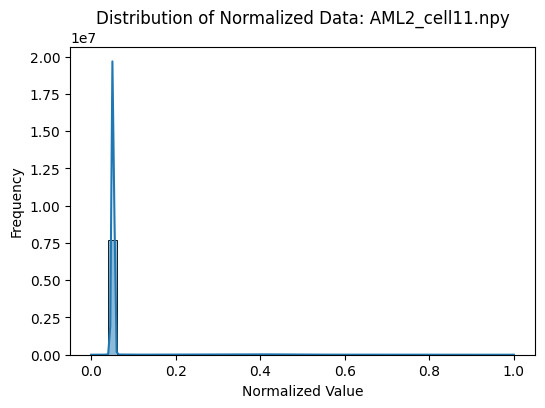


 data key :AML3_cell16.npy


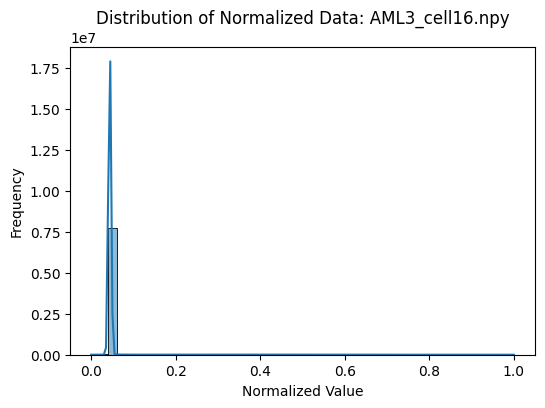


 data key :Tomogramma_BuddingYeastCell.npy


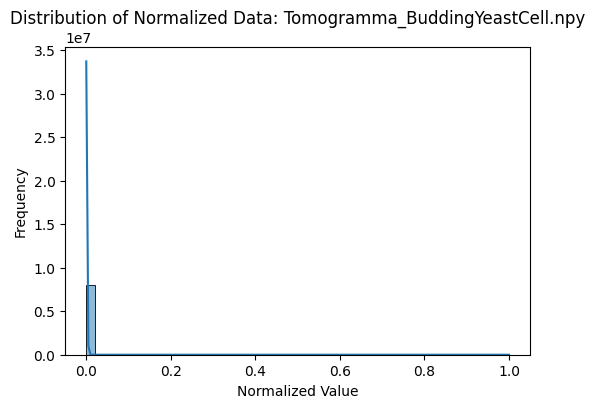


 data key :Tomogramma_Cell1.npy


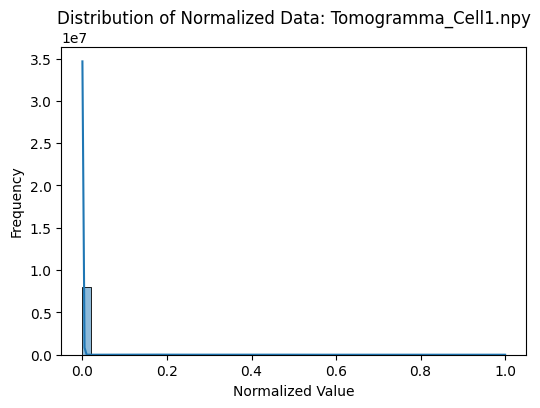


 data key :Tomogramma_Cell2.npy


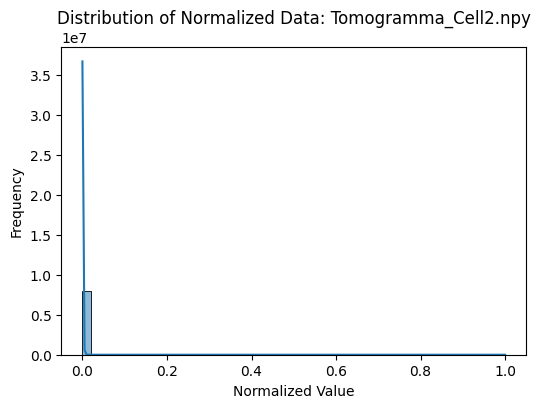


 data key :Tomogramma_Cell3.npy


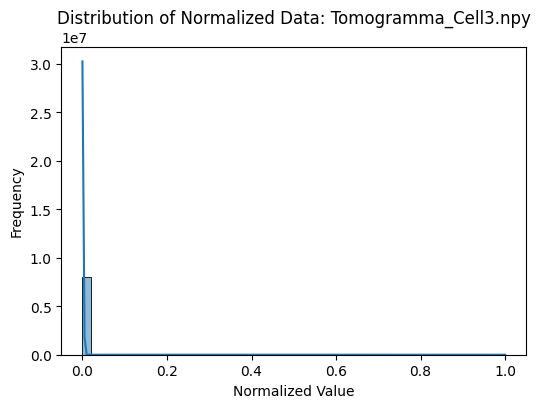


 data key :tomo_Grafene_24h.npy


In [ ]:
# import sys
# module_path = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\modules"
# if not os.path.exists(module_path):
#     print(f" i am looking for the Gaetano sys path")
#     module_path = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\modules"
    
# # Add the module path to sys.path if it's nat already there
# print(f"module path: {module_path}")
# if module_path not in sys.path:
#     sys.path.append(module_path)


import os
import sys
from pathlib import Path

# BASE_DIR = Path.cwd().parent
# SRC_DIR = Path.cwd().parent/"src"
# if str(SRC_DIR) not in sys.path:
#     sys.path.append(str(SRC_DIR))

# this is just for adding src/ path here so that I can call another script 
#  src/path_manager.py which will add module path in my system path to implement here in jupyter. for calling differents modules.
# from addpathsrc_addpathscript import addpath 
# addpath()
from path_manager_JupyterCopy import AddPath
AddPath()


from histogramplot import plot_normalizedata_hist
# from plot3dint import plot3dinteractive

for keyval in normalized_data:
    datakey = keyval
    print(f"\n data key :{datakey}")
    dataval = normalized_data[datakey]
    voldata=dataval
    keyvalue = datakey
    # plot3dinteractive(voldata,keyvalue)
    plot_normalizedata_hist(dataval,datakey)

## Step 2: Feature Extraction & Quantile-Based Thresholding
- Now that your 3D datasets are normalized, we will proceed with Feature Extraction & Quantile-Based Thresholding to identify meaningful substructures.
###  Why This Step is Important?
- Feature Extraction helps in understanding the distribution of voxel intensities.
- Quantile-Based Thresholding helps to filter noise and identify significant regions in the dataset.

## - What I Will Do?

-  Step 1: Extract statistical features (mean, variance, quantiles)
-  Step 2: Apply Quantile-Based Thresholding (0.95, 0.99 quantiles)
-  Step 3: Visualize the thresholded regions in 3D slices




AML2_cell11_normalized.npy: Mean=0.0637, Std Dev=0.0679, Q95=0.0515, Q99=0.4434
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\AML2_cell11_normalized.npy_thresh.png


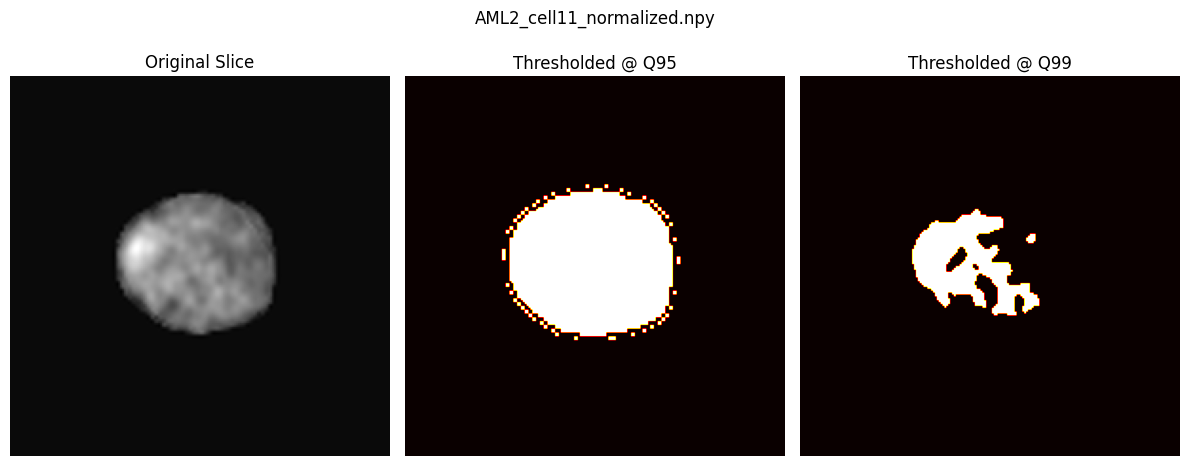

AML3_cell16_normalized.npy: Mean=0.0559, Std Dev=0.0754, Q95=0.0439, Q99=0.4803
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\AML3_cell16_normalized.npy_thresh.png


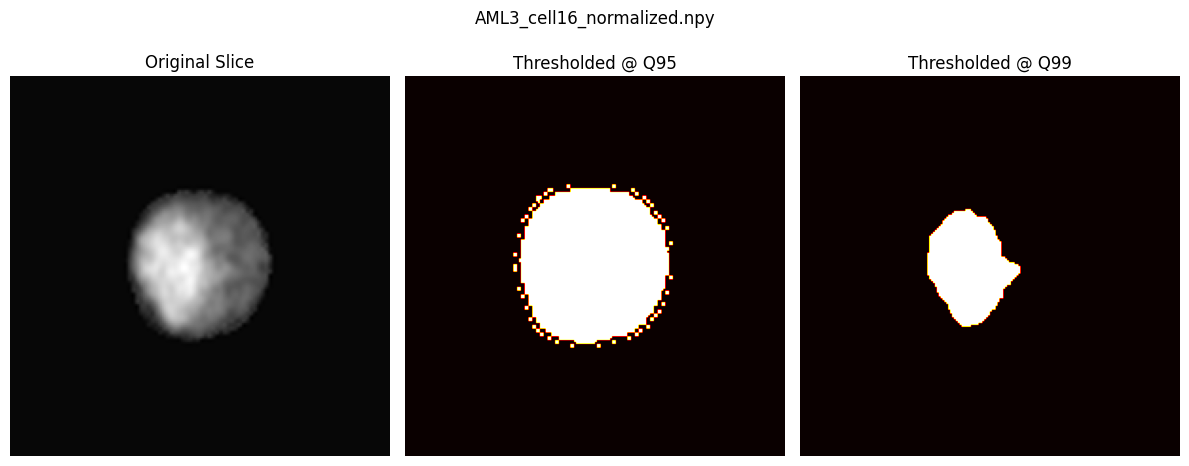

Tomogramma_BuddingYeastCell_normalized.npy: Mean=0.0051, Std Dev=0.0456, Q95=0.0000, Q99=0.2749
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\Tomogramma_BuddingYeastCell_normalized.npy_thresh.png


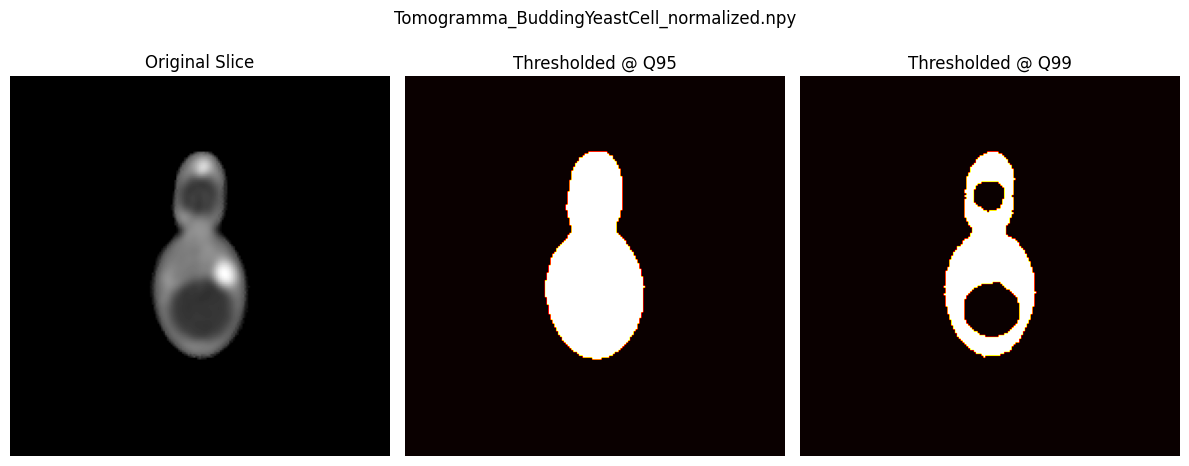

Tomogramma_Cell1_normalized.npy: Mean=0.0052, Std Dev=0.0443, Q95=0.0000, Q99=0.2703
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\Tomogramma_Cell1_normalized.npy_thresh.png


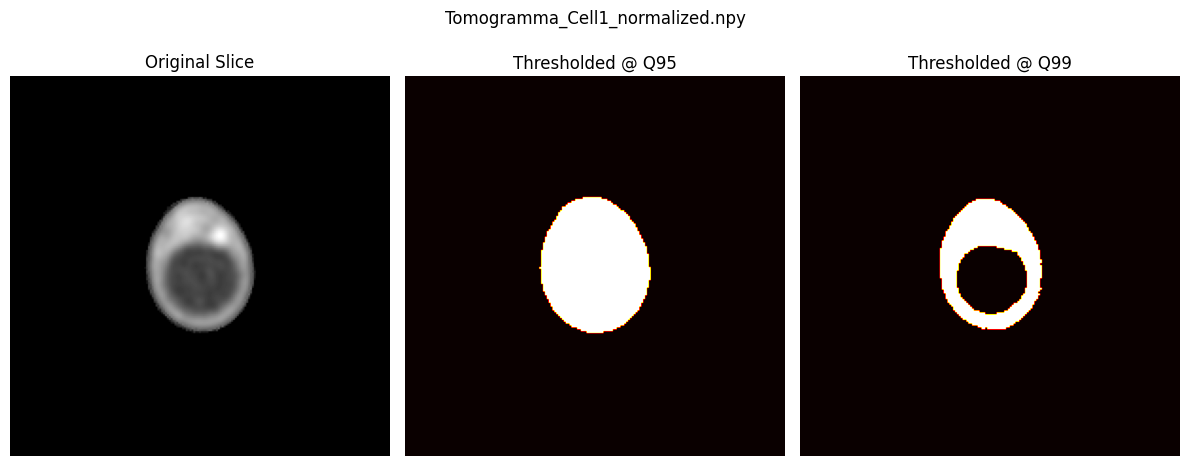

Tomogramma_Cell2_normalized.npy: Mean=0.0043, Std Dev=0.0421, Q95=0.0000, Q99=0.2166
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\Tomogramma_Cell2_normalized.npy_thresh.png


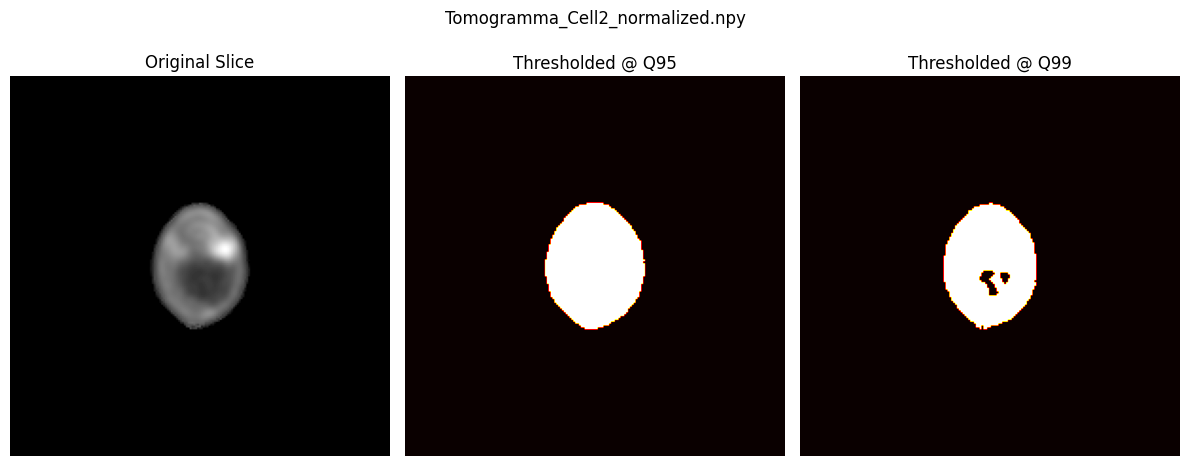

Tomogramma_Cell3_normalized.npy: Mean=0.0057, Std Dev=0.0508, Q95=0.0000, Q99=0.2945
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\Tomogramma_Cell3_normalized.npy_thresh.png


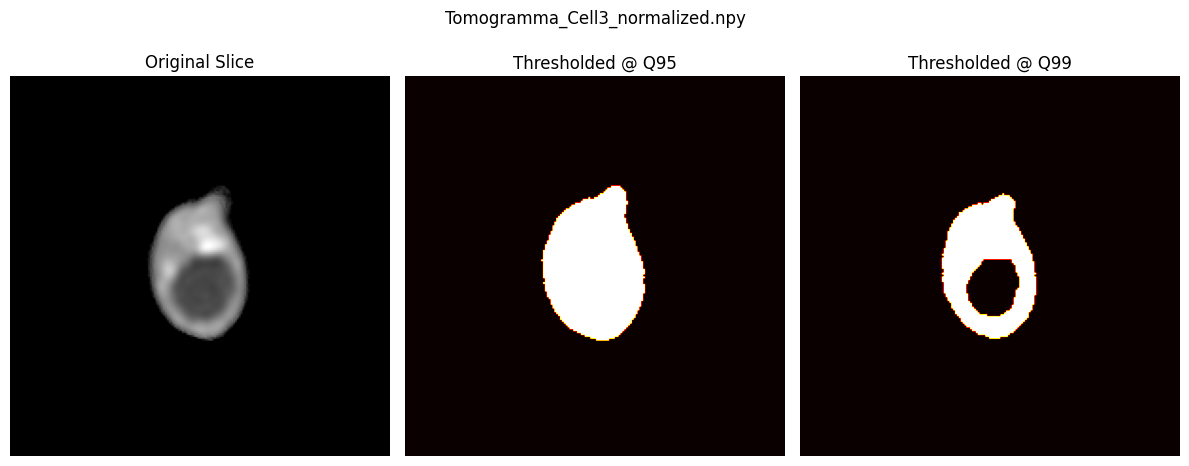

tomo_Grafene_24h_normalized.npy: Mean=0.1049, Std Dev=0.1968, Q95=0.4977, Q99=0.5749
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\tomo_Grafene_24h_normalized.npy_thresh.png


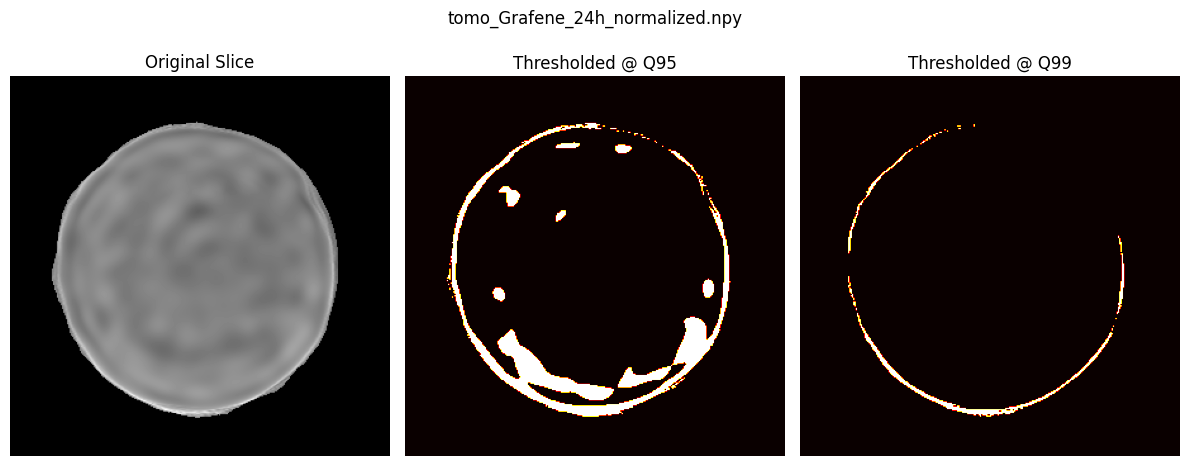

tomo_grafene_48h_normalized.npy: Mean=0.2484, Std Dev=0.0289, Q95=0.3050, Q99=0.3688
🖼️ Saved PNG: E:\Projects\substructure_3d_data\results\tomo_grafene_48h_normalized.npy_thresh.png


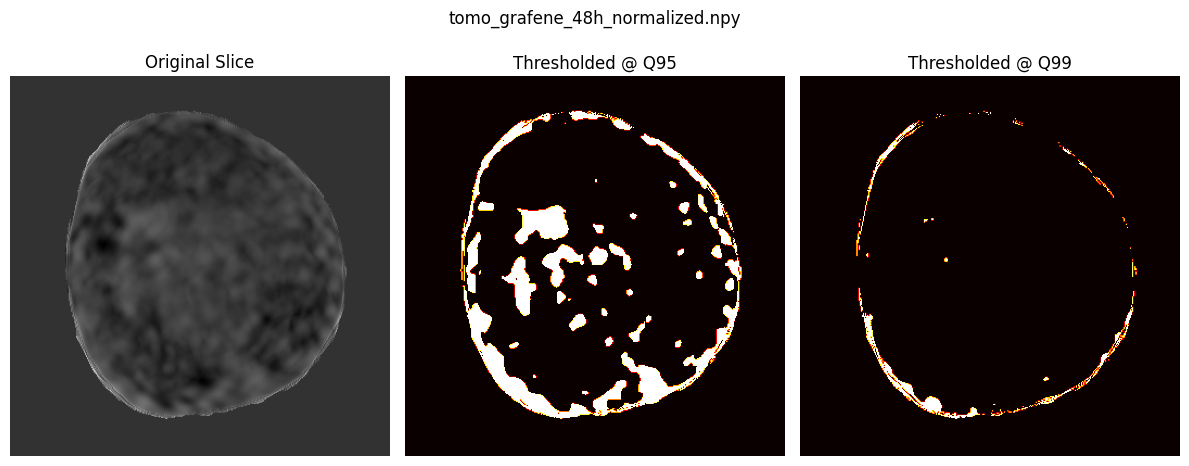

✅ Features saved to: E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\results\featureQuantileThres\ThresQuntFeature.txt


In [42]:
from pathlib import Path  # type: ignore

from feature_thresholding import FeatureQuantileThresholding 
from listspecificfiles import readlistFiles  

data_dir = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\normalized_npyData"
save_dir = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\results\featureQuantileThres"
cwd = Path.cwd().parent.parent
BASE_DIR = cwd/ "results"

fq = FeatureQuantileThresholding(data_dir, save_dir, BASE_DIR=BASE_DIR)
fq.process(visualize=True, save_features=True)



In [ ]:
# import sys
# # from pathlib import Path
# import os

# # **Get Base Directory of Project**
# # BASE_DIR = Path.cwd().parent  # Moves one level up from notebook directory
# BASE_DIR = Path.cwd().parent  # Moves one level up from notebook directory
# # BASE_DIR = Path(__file__).resolve().parent.parent  # Moves 2 levels up to project root -->  for vs code.

# print(f" Base directory :{BASE_DIR}")
# # **Define Correct Module Path (inside src/)**
# MODULES_DIR = BASE_DIR / "src" / "modules"

# # **Convert to string & add to sys.path**
# sys.path.append(str(MODULES_DIR))

# # **Verify path added correctly**
# # print("Updated Python Path:", sys.path)

# # **Now, try importing your module**
# from listspecificfiles import readlistFiles

# print(" Module imported successfully!")

In [ ]:
# from pathlib import Path
# parent_dir = Path.cwd().parent
# child_dir = Path.cwd().parent/ "src"  # here we moved to the child directory.
# Base_dir = Path.cwd()
# print(f"parent_dir: {parent_dir} \ncurrent directory: {Base_dir} \nchild directory:{child_dir}\n")

In [ ]:
# import os
# import numpy as np
# import plotly.graph_objects as go
# import gc  # Garbage collector to free memory

# def plot3dinteractive(voldata, keyvalue, output_dir, sample_fraction=0.005):
#     """Plots large 3D NumPy arrays interactively and saves as HTML.
    
#     - `voldata`: Input 3D NumPy array.
#     - `keyvalue`: Filename for saving.
#     - `output_dir`: Directory to save HTML plots.
#     - `sample_fraction`: Fraction of points to randomly plot.
#     """
#     array_3d = voldata
#     x1, y1, z1 = array_3d.shape
#     print(f"Shape of {keyvalue}: {x1, y1, z1}")

#     # Create a 3D meshgrid
#     x, y, z = np.meshgrid(np.arange(x1), np.arange(y1), np.arange(z1))

#     # Mask non-zero values
#     mask = array_3d > 0
#     x_vals = x[mask].flatten()
#     y_vals = y[mask].flatten()
#     z_vals = z[mask].flatten()
#     values = array_3d[mask].flatten()

#     # **Randomly sample points** to reduce memory usage
#     num_points = len(values)
#     sample_size = int(num_points * sample_fraction)

#     if sample_size > 0:
#         indices = np.random.choice(num_points, sample_size, replace=False)
#         x_vals = x_vals[indices]
#         y_vals = y_vals[indices]
#         z_vals = z_vals[indices]
#         values = values[indices]
#     else:
#         print(f"⚠ Warning: Not enough non-zero points for {keyvalue}. Skipping...")
#         return

#     print(f"Plotting {sample_size} points out of {num_points} ({sample_fraction * 100}% sampled)")

#     # **Enhanced Color Grading**
#     colorscale = [
#         [0.0, "white"],    # Outer structure (light color)
#         [0.2, "lightblue"],
#         [0.4, "deepskyblue"],
#         [0.6, "dodgerblue"],
#         [0.8, "blue"],      # Middle layers
#         [1.0, "darkblue"]   # Deep inner structure (dark color)
#     ]

#     # Create a 3D scatter plot
#     fig = go.Figure(data=go.Scatter3d(
#         x=x_vals,
#         y=y_vals,
#         z=z_vals,
#         mode='markers',
#         marker=dict(
#             size=2,
#             color=values,
#             colorscale=colorscale,
#             opacity=0.5
#         )
#     ))

#     # Set axis labels and layout
#     fig.update_layout(
#         title=f"3D Structure: {keyvalue}",
#         scene=dict(
#             xaxis_title='X',
#             yaxis_title='Y',
#             zaxis_title='Z',
#             bgcolor="black"  # Dark background for better contrast
#         )
#     )

#     # **Save plot as an interactive HTML file**
#     save_path = os.path.join(output_dir, f"{keyvalue}.html")
#     fig.write_html(save_path)
#     print(f"✅ Saved: {save_path}")

#     # **Clear memory**
#     del fig, x_vals, y_vals, z_vals, values
#     gc.collect()  # Garbage collection to free memory

# # **Directory paths**
# data_dir = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\intermdata1"
# output_dir = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\raw"

# # **Ensure output directory exists**
# os.makedirs(output_dir, exist_ok=True)

# # **Process all .npy files one by one**
# npy_files = [f for f in os.listdir(data_dir) if f.endswith(".npy")]

# for filename in npy_files:
#     file_path = os.path.join(data_dir, filename)
#     voldata = np.load(file_path)  # Load .npy file
#     plot3dinteractive(voldata, filename, output_dir, sample_fraction=0.05)  # Save & clear memory
